In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import pandas as pd
full = pd.read_csv("train_set.csv")
train,test=train_test_split(full, test_size=0.2, random_state=42)
pred= pd.read_csv("test_set.csv")
train.head()

Num GPUs Available:  0


In [2]:
import os

# Define the root directory of the dataset
root_dir = 'stanford_car_dataset'

# Function to display folder structure (excluding files)
def display_folder_structure(root_dir, indent=''):
    for item in os.listdir(root_dir):
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):
            print(indent + '+-- ' + item)
            display_folder_structure(item_path, indent + '    ')


In [16]:
import os
import shutil

# Define the root directory
root_dir = 'stanford_car_dataset/car_data/car_data/test'

# Define the validation directory
validation_dir = 'stanford_car_dataset/car_data/car_data/validation'

# Create the validation directory if it doesn't exist
os.makedirs(validation_dir, exist_ok=True)

# Iterate through each class directory in the test directory
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)

    # Create the corresponding class directory in the validation directory
    os.makedirs(validation_class_dir, exist_ok=True)

    # Move half of the images from the test class directory to the validation class directory
    image_files = os.listdir(class_dir)
    num_images_to_move = len(image_files) // 2
    for image_file in image_files[:num_images_to_move]:
        src = os.path.join(class_dir, image_file)
        dst = os.path.join(validation_class_dir, image_file)
        shutil.move(src, dst)

print("Half of the images from the test directory have been moved to the validation directory.")



Half of the images from the test directory have been moved to the validation directory.


In [3]:
import os

# Define the root directory
root_dir = 'stanford_car_dataset/car_data/car_data'

# Define the train, test, and validation directories
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
validation_dir = os.path.join(root_dir, 'validation')

# Function to count the number of images in a directory
def count_images(directory):
    count = 0
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        count += len(os.listdir(class_dir))
    return count

# Count the number of images in train, test, and validation directories
train_count = count_images(train_dir)
test_count = count_images(test_dir)
validation_count = count_images(validation_dir)

print("Number of images in train directory:", train_count)
print("Number of images in test directory:", test_count)
print("Number of images in validation directory:", validation_count)


Number of images in train directory: 8144
Number of images in test directory: 4064
Number of images in validation directory: 3977


In [9]:
count_images(preprocessed_dir)

16139

In [4]:
!pip install opencv-python-headless


  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.5 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.3/38.5 MB 2.0 MB/s eta 0:00:20
   ---------------------------------------- 0.4/38.5 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.4/38.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.5/38.5 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.6/38.5 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.7/38.5 MB 1.9 MB/s eta 0:00:20
    --------------------------------------- 0.8/38.5 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.9/38.5 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.1/38.5 MB 2.0 MB/s eta 0:00:19
   - --------

In [5]:
import os
import cv2
import pandas as pd

# Function to load bounding box annotations from a CSV file
def load_annotations(annotation_file):
    annotations = pd.read_csv(annotation_file, delimiter=',', header=None)
    annotations.columns = ['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']
    return annotations

# Function to crop the image based on bounding box annotations
def crop_image_with_annotations(image_path, annotations):
    img = cv2.imread(image_path)
    filename = os.path.basename(image_path)
    annotation = annotations[annotations['filename'] == filename]
    if not annotation.empty:
        x_min, y_min, x_max, y_max = annotation.iloc[0, 1:5]
        cropped_img = img[y_min:y_max, x_min:x_max]
        return cropped_img
    else:
        return None

root_dir = 'stanford_car_dataset\car_data\car_data'

# Define the train, test, and validation directories
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
validation_dir = os.path.join(root_dir, 'validation')

# Define the root directory
root_dir = 'stanford_car_dataset'
# Define the directories where preprocessed images will be saved
preprocessed_train_dir = "preprocessed_train"
preprocessed_test_dir = "preprocessed_test"
preprocessed_validation_dir = "preprocessed_validation"

# Load bounding box annotations for training and testing images
anno_train_file = os.path.join(root_dir, 'anno_train.csv')
anno_test_file = os.path.join(root_dir, 'anno_test.csv')
annotations_train = load_annotations(anno_train_file)
annotations_test = load_annotations(anno_test_file)

# Create the directories for preprocessed images if they don't exist
os.makedirs(preprocessed_train_dir, exist_ok=True)
os.makedirs(preprocessed_test_dir, exist_ok=True)
os.makedirs(preprocessed_validation_dir, exist_ok=True)

# Define the maximum dimension for scaling
max_dimension = 300

# Preprocess training images
for root, dirs, files in os.walk(train_dir):
    for img_name in files:
        img_path = os.path.join(root, img_name)
        
        # Crop the image based on bounding box annotations
        cropped_img = crop_image_with_annotations(img_path, annotations_train)
        if cropped_img is not None:
            # Resize the cropped image to the desired size (if needed)
            cropped_img = cv2.resize(cropped_img, (max_dimension, max_dimension))
            
            # Convert the image to grayscale
            img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
            
            # Save the preprocessed image
            rel_path = os.path.relpath(img_path, train_dir)
            preprocessed_img_path = os.path.join(preprocessed_train_dir, rel_path)
            os.makedirs(os.path.dirname(preprocessed_img_path), exist_ok=True)
            cv2.imwrite(preprocessed_img_path, img_gray)

print("Preprocessing of training images completed.")

# Preprocess testing images
for root, dirs, files in os.walk(test_dir):
    for img_name in files:
        img_path = os.path.join(root, img_name)
        
        # Crop the image based on bounding box annotations
        cropped_img = crop_image_with_annotations(img_path, annotations_test)
        if cropped_img is not None:
            # Resize the cropped image to the desired size (if needed)
            cropped_img = cv2.resize(cropped_img, (max_dimension, max_dimension))
            
            # Convert the image to grayscale
            img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
            
            # Save the preprocessed image
            rel_path = os.path.relpath(img_path, test_dir)
            preprocessed_img_path = os.path.join(preprocessed_test_dir, rel_path)
            os.makedirs(os.path.dirname(preprocessed_img_path), exist_ok=True)
            cv2.imwrite(preprocessed_img_path, img_gray)

print("Preprocessing of testing images completed.")

# Preprocess validation images
for root, dirs, files in os.walk(validation_dir):
    for img_name in files:
        img_path = os.path.join(root, img_name)
        
        # Crop the image based on bounding box annotations
        cropped_img = crop_image_with_annotations(img_path, annotations_test)
        if cropped_img is not None:
            # Resize the cropped image to the desired size (if needed)
            cropped_img = cv2.resize(cropped_img, (max_dimension, max_dimension))
            
            # Convert the image to grayscale
            img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
            
            # Save the preprocessed image
            rel_path = os.path.relpath(img_path, validation_dir)
            preprocessed_img_path = os.path.join(preprocessed_validation_dir, rel_path)
            os.makedirs(os.path.dirname(preprocessed_img_path), exist_ok=True)
            cv2.imwrite(preprocessed_img_path, img_gray)

print("Preprocessing of validation images completed.")

Preprocessing of training images completed.
Preprocessing of testing images completed.
Preprocessing of validation images completed.


In [37]:
import os


# Define the train, test, and validation directories
train_dir = 'preprocessed_train'
test_dir = 'preprocessed_test'
validation_dir = 'preprocessed_validation'

# Function to count the number of images in a directory
def count_images(directory):
    count = 0
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        count += len(os.listdir(class_dir))
    return count

# Count the number of images in train, test, and validation directories
train_count = count_images(train_dir)
test_count = count_images(test_dir)
validation_count = count_images(validation_dir)

print("Number of images in train directory:", train_count)
print("Number of images in test directory:", test_count)
print("Number of images in validation directory:", validation_count)

Number of images in train directory: 8144
Number of images in test directory: 4064
Number of images in validation directory: 3977


In [38]:
!pip install tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 32

# Define train, validation, and test data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained ResNet-50 model
strategy = tf.distribute.MirroredStrategy()  # Utilize all available GPUs
with strategy.scope():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Add custom classifier on top of ResNet-50
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    predictions = layers.Dense(len(train_generator.class_indices), activation='softmax')(x)

    # Define model
    model = models.Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)



Found 8144 images belonging to 196 classes.
Found 3977 images belonging to 196 classes.
Found 4064 images belonging to 196 classes.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/10


C:\Users\Javier\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


254/254 ━━━━━━━━━━━━━━━━━━━━ 2521s 10s/step - accuracy: 0.0102 - loss: 5.3608 - val_accuracy: 0.0086 - val_loss: 5.2769
Epoch 2/10
  1/254 ━━━━━━━━━━━━━━━━━━━━ 42:48 10s/step - accuracy: 0.0000e+00 - loss: 5.1520

C:\Users\Javier\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


254/254 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0000e+00 - loss: 5.1520 - val_accuracy: 0.0000e+00 - val_loss: 5.2843
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2530s 10s/step - accuracy: 0.0194 - loss: 5.0518 - val_accuracy: 0.0053 - val_loss: 6.7942
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0000e+00 - loss: 4.8216 - val_accuracy: 0.0000e+00 - val_loss: 6.0415
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2229s 9s/step - accuracy: 0.0304 - loss: 4.7270 - val_accuracy: 0.0098 - val_loss: 5.8365
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0625 - loss: 4.7064 - val_accuracy: 0.0000e+00 - val_loss: 5.0228
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2707s 11s/step - accuracy: 0.0541 - loss: 4.3797 - val_accuracy: 0.0320 - val_loss: 4.8508
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0312 - loss: 4.1666 - val_accuracy: 0.0000e+00 - val_loss: 5.0351
Epoch 9/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2568s 10s/step - accuracy: 0.0826 - loss: 

In [7]:
model.save('resnet50_model.h5')


In [8]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('resnet50_model.h5')

In [9]:
import numpy as np

# Function to calculate expected calibration error (ECE)
def expected_calibration_error(y_true, y_prob, n_bins=10):
    # Calculate bin boundaries
    bin_boundaries = np.linspace(0, 1, n_bins + 1)

    # Assign predictions to bins
    bin_indices = np.digitize(y_prob, bin_boundaries[1:-1])

    # Compute accuracy and confidence for each bin
    accuracies = []
    confidences = []
    for i in range(1, n_bins + 1):
        bin_mask = bin_indices == i
        if np.sum(bin_mask) > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == (y_prob[bin_mask] > 0.5))
            bin_confidence = np.mean(y_prob[bin_mask])
            accuracies.append(bin_accuracy)
            confidences.append(bin_confidence)
    accuracies = np.array(accuracies)
    confidences = np.array(confidences)

    # Compute expected calibration error (ECE)
    ece = np.abs(confidences - accuracies).mean()

    return ece

y_prob = model.predict(validation_generator)
y_true = validation_generator.classes

ece = expected_calibration_error(y_true, y_prob)
print("Expected Calibration Error (ECE):", ece)


125/125 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [11]:
y_prob


array([[4.75297275e-04, 3.80226318e-03, 2.31626281e-03, ...,
        5.25432522e-04, 3.73555231e-04, 4.08862077e-04],
       [2.90043272e-06, 1.03103681e-04, 3.56559153e-03, ...,
        2.47004000e-03, 4.75880399e-04, 1.04036684e-04],
       [2.52490972e-05, 5.57537191e-04, 3.61730868e-04, ...,
        6.86913496e-04, 3.08367088e-02, 2.12385575e-03],
       ...,
       [7.75588909e-04, 2.59575876e-03, 4.86007280e-04, ...,
        3.84527026e-03, 6.28878915e-05, 5.74011996e-04],
       [5.04551899e-05, 1.74760527e-03, 7.88175035e-03, ...,
        1.27197634e-02, 1.54439628e-03, 1.36774965e-03],
       [1.24913314e-03, 3.83337319e-04, 4.95721797e-05, ...,
        7.57390881e-05, 2.22279443e-04, 9.44319709e-06]], dtype=float32)

In [24]:
def expected_calibration_error(y_true, y_prob, n_bins=10):
    # Calculate bin boundaries
    bin_boundaries = np.linspace(0, 1, n_bins + 1)

    # Assign predictions to bins
    bin_indices = np.digitize(y_prob, bin_boundaries[1:-1])

    # Flatten bin_indices to ensure it's a 1D array
    bin_indices = np.ravel(bin_indices)

    # Initialize lists to store bin accuracies and confidences
    bin_accuracies = [[] for _ in range(n_bins)]
    bin_confidences = [[] for _ in range(n_bins)]

    # Populate lists with accuracy and confidence values for each bin
    for i in range(len(y_prob)):
        bin_index = bin_indices[i] - 1  # Adjust index to start from 0
        bin_accuracies[bin_index].append(y_true[i] == np.argmax(y_prob[i]))
        bin_confidences[bin_index].append(np.max(y_prob[i]))

    # Calculate bin-wise accuracy and confidence means
    bin_accuracies_mean = [np.mean(acc) if acc else 0 for acc in bin_accuracies]
    bin_confidences_mean = [np.mean(conf) if conf else 0 for conf in bin_confidences]

    # Compute expected calibration error (ECE)
    ece = np.abs(np.array(bin_accuracies_mean) - np.array(bin_confidences_mean)).mean()

    return ece

ece = expected_calibration_error(y_true, y_prob)
print("Expected Calibration Error (ECE):", ece)


Expected Calibration Error (ECE): 0.06354611914965415


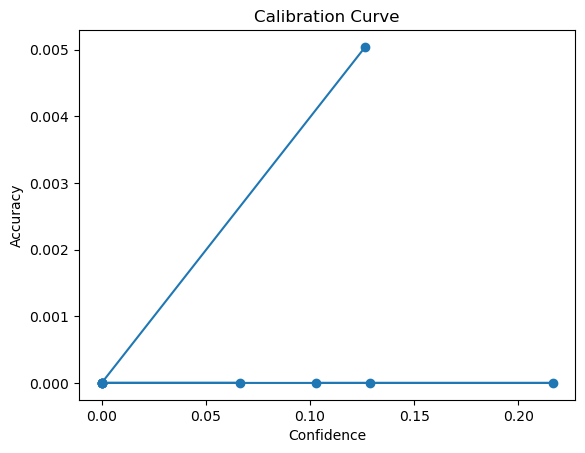

In [25]:
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_prob, n_bins=10):
    # Calculate bin boundaries
    bin_boundaries = np.linspace(0, 1, n_bins + 1)

    # Assign predictions to bins
    bin_indices = np.digitize(y_prob, bin_boundaries[1:-1])

    # Flatten bin_indices to ensure it's a 1D array
    bin_indices = np.ravel(bin_indices)

    # Initialize lists to store bin accuracies and confidences
    bin_accuracies = [[] for _ in range(n_bins)]
    bin_confidences = [[] for _ in range(n_bins)]

    # Populate lists with accuracy and confidence values for each bin
    for i in range(len(y_prob)):
        bin_index = bin_indices[i] - 1  # Adjust index to start from 0
        bin_accuracies[bin_index].append(y_true[i] == np.argmax(y_prob[i]))
        bin_confidences[bin_index].append(np.max(y_prob[i]))

    # Calculate bin-wise accuracy and confidence means
    bin_accuracies_mean = [np.mean(acc) if acc else 0 for acc in bin_accuracies]
    bin_confidences_mean = [np.mean(conf) if conf else 0 for conf in bin_confidences]

    # Plot calibration curve
    plt.plot(bin_confidences_mean, bin_accuracies_mean, marker='o', linestyle='-')
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.title('Calibration Curve')
    plt.show()

plot_calibration_curve(y_true, y_prob)


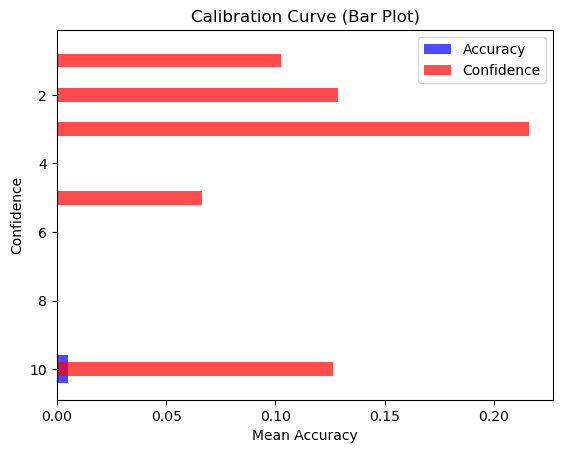

In [27]:
def plot_calibration_curve_bar(y_true, y_prob, n_bins=10):
    # Calculate bin boundaries
    bin_boundaries = np.linspace(0, 1, n_bins + 1)

    # Assign predictions to bins
    bin_indices = np.digitize(y_prob, bin_boundaries[1:-1])

    # Flatten bin_indices to ensure it's a 1D array
    bin_indices = np.ravel(bin_indices)

    # Initialize lists to store bin accuracies and confidences
    bin_accuracies = [[] for _ in range(n_bins)]
    bin_confidences = [[] for _ in range(n_bins)]

    # Populate lists with accuracy and confidence values for each bin
    for i in range(len(y_prob)):
        bin_index = bin_indices[i] - 1  # Adjust index to start from 0
        bin_accuracies[bin_index].append(y_true[i] == np.argmax(y_prob[i]))
        bin_confidences[bin_index].append(np.max(y_prob[i]))

    # Calculate bin-wise accuracy and confidence means
    bin_accuracies_mean = [np.mean(acc) if acc else 0 for acc in bin_accuracies]
    bin_confidences_mean = [np.mean(conf) if conf else 0 for conf in bin_confidences]

    # Plot calibration curve as a bar plot
    plt.barh(range(1, n_bins + 1), bin_accuracies_mean, height=0.8, alpha=0.7, label='Accuracy', color='blue')
    plt.barh(range(1, n_bins + 1), bin_confidences_mean, height=0.4, alpha=0.7, label='Confidence', color='red')
    plt.ylabel('Confidence')
    plt.xlabel('Mean Accuracy')
    plt.title('Calibration Curve (Bar Plot)')
    plt.legend(loc='upper right')
    plt.gca().invert_yaxis()  # Invert y-axis to have higher confidence on top
    plt.show()

plot_calibration_curve_bar(y_true, y_prob)


In [20]:
bin_boundaries = np.linspace(0, 1, 10 + 1)